## **PUTRI NUR AINI MAHFUDZ (M203Y0411)**

## **Membuat Model Machine Learning dengan Data Time Series**

---



## Berikut ini Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series yang saya kerjakan dengan memenuhi kriteria submission yang ada.

Dataset didapatkan dari : https://www.kaggle.com/datasets/grubenm/austin-weather

## Steps:

### 1. Impor library

In [10]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

### 2. Ubah dataset menjadi dataframe, lalu panggil fungsi head() untuk menampilkan sampel teratas pada dataset

In [11]:
data_train = pd.read_csv('austin_weather.csv')
data_train.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


### 3. Cek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull()


In [12]:
data_train.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

### 4. Pastikan dataset memiliki lebih dari 1000 sampel data

In [13]:
data_train.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


### 5. Buat plot dari data menggunakan fungsi plot dari library matplotlib

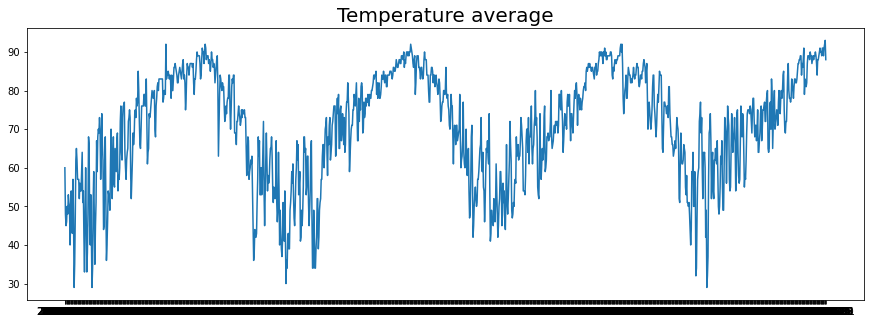

In [14]:
dates = data_train['Date'].values
temp  = data_train['TempAvgF'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);


### 6.  Lakukan pemisahan data menjadi data latih dan data testing

In [15]:
from sklearn.model_selection import train_test_split
date_latih, date_test, temp_latih, temp_test = train_test_split(dates, temp, test_size=0.2, shuffle=False)

### 7. Inisiasi fungsi windowed dataset

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

### 8. Memanggil fungsi windowed dataset dan membangun model menggunakan model sequential

In [17]:
train_set = windowed_dataset(temp_latih, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(temp_test, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, return_sequences=True,  input_shape=[None, 1]),
  tf.keras.layers.LSTM(30),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

### 9. Menghitung nilai 10% MAE 

In [18]:
minMae = (data_train['TempAvgF'].max() - data_train['TempAvgF'].min()) * 10/100
print(minMae)


6.4


### 10. Menerapkan Callback, training akan berhenti jika sudah menunjukkan <10%

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('mae')<minMae) & (logs.get('val_mae')<minMae):
      print('\nMAE sudah mencapai <10%!')
      self.model.stop_training = True

callbacks = myCallback()

### 11. Compile dan lakukan training pada model

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
    )
history = model.fit(
    train_set,
    epochs=200,
    validation_data=test_set,
    verbose=2,
    callbacks=[callbacks],
    )

Epoch 1/200
10/10 - 5s - loss: 71.3605 - mae: 71.8605 - val_loss: 73.7121 - val_mae: 74.2121 - 5s/epoch - 546ms/step
Epoch 2/200
10/10 - 1s - loss: 71.2915 - mae: 71.7915 - val_loss: 73.6150 - val_mae: 74.1150 - 835ms/epoch - 84ms/step
Epoch 3/200
10/10 - 1s - loss: 71.1842 - mae: 71.6842 - val_loss: 73.4944 - val_mae: 73.9944 - 826ms/epoch - 83ms/step
Epoch 4/200
10/10 - 1s - loss: 71.0777 - mae: 71.5777 - val_loss: 73.4282 - val_mae: 73.9282 - 818ms/epoch - 82ms/step
Epoch 5/200
10/10 - 1s - loss: 71.0217 - mae: 71.5217 - val_loss: 73.3781 - val_mae: 73.8781 - 841ms/epoch - 84ms/step
Epoch 6/200
10/10 - 1s - loss: 70.9705 - mae: 71.4705 - val_loss: 73.3256 - val_mae: 73.8256 - 821ms/epoch - 82ms/step
Epoch 7/200
10/10 - 1s - loss: 70.9171 - mae: 71.4171 - val_loss: 73.2712 - val_mae: 73.7712 - 818ms/epoch - 82ms/step
Epoch 8/200
10/10 - 1s - loss: 70.8618 - mae: 71.3618 - val_loss: 73.2146 - val_mae: 73.7146 - 812ms/epoch - 81ms/step
Epoch 9/200
10/10 - 1s - loss: 70.8040 - mae: 71.3

### 12. Membuat plot loss dan akurasi pada saat training dan validation

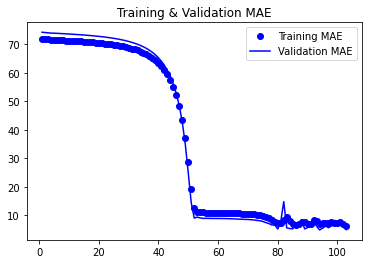

<Figure size 432x288 with 0 Axes>

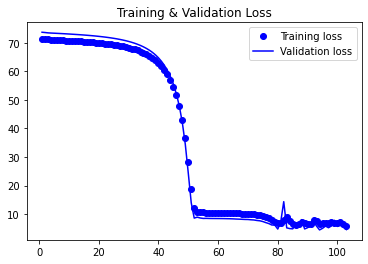

<Figure size 432x288 with 0 Axes>

In [23]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training & Validation MAE')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.figure()
plt.show()

## **Terimakasih.**

## **Submission project kelas Belajar Pengembangan Machine Learning - 2022** 